 5 days spot momentum strategy:
 ==========
 
 The goals behind this notebook is to backtest a 5 days spot momentum strategy using the log returns of 25 currency pairs. The returns all assume that the US dollar is the central currency and hence we can analyze the strategy.
 
 Description of the strategy
 ----
 in The 5 days spot momentum strategy.We have as an input the logarithmic returns of different indices starting from 2004 i.e the date when all indices data are availabe ,to november 2019 . The strategy at first calculates the average 5 days past performance of the indices and then chooses the indices that it will go long or short according to the following algorithm:
 1. The five best performing average indices are held in long positions , while the least performing are held in short postitions.
 2. After choosing the indices to hold , we hold these positions for another five days in portfolios where we invest equally in each contract
 3. After the holding period is done , we measure again the five days performance and repeat the same process
 
 Backtesting the strategy:
 ----
 To analyze the strategy we will try to analyze and provide comments. The backtesting appraoch provided here is different to that provided by my colleagues in that it provides a deeper analysis by the ability to know :
 
 1. The positions held(long or short) at each week of the trading strategy
 2. The evolution of our portfolio on a daily basis
 3. The ability to analyze the results without sampling the time frames
 
 Hypotheses of the strategy:
 ---
 
 1. there are no transaction costs
 2. The market is liquid and our strategy doesn't affect the market liquidity
 
 Starting the notebook:
 ----
 First let's import the log returns of the strategy and the libraries that we will use in backtesting.

In [8]:
import pandas as pd
import numpy as np
import xlrd
import datetime
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("log_daily_return.csv", sep=";", index_col="Date" ,decimal = ",")
data.head()

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
02/01/2004,-0.005029,-0.001915,0.001900,-0.001109,-0.011883,0.004812,0.002103,0.002122,0.000109,0.003259,...,0.000360,-0.002570,-0.000086,0.002202,-0.017378,-0.001840,0.002102,-0.001578,-0.000524,-0.000838
05/01/2004,-0.013253,-0.010475,-0.006705,-0.008215,-0.020881,-0.004542,-0.006691,-0.013268,0.000220,-0.007722,...,-0.004873,-0.010412,-0.000137,-0.002490,-0.034509,-0.003327,-0.004796,-0.006237,-0.003832,0.009902
06/01/2004,-0.003855,0.001237,-0.005991,0.001979,-0.014846,-0.005849,-0.005980,-0.004768,-0.000549,-0.006221,...,-0.002627,-0.006144,-0.000178,0.000426,0.028393,-0.000536,-0.003391,-0.004564,-0.006983,0.008516
07/01/2004,0.001496,0.003327,0.004160,0.001911,0.003358,0.008257,0.004245,0.013311,-0.001755,0.003594,...,0.000998,0.001819,0.000143,-0.001356,0.011815,0.001749,0.004613,-0.003456,0.005712,-0.000714


---
Cleaning Data
---
The data contains the daily log returns of each 
After importing the data.I will remove the first column so that it won't induce my approach to an error.The reason the first day returns are zeros are already described in the report.

In [3]:
data.drop(labels = data.index[0] ,axis= 'index' ,inplace = True)
data.head()

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2004,-0.005029,-0.001915,0.001900,-0.001109,-0.011883,0.004812,0.002103,0.002122,0.000109,0.003259,...,0.000360,-0.002570,-0.000086,0.002202,-0.017378,-0.001840,0.002102,-1.578288e-03,-0.000524,-0.000838
05/01/2004,-0.013253,-0.010475,-0.006705,-0.008215,-0.020881,-0.004542,-0.006691,-0.013268,0.000220,-0.007722,...,-0.004873,-0.010412,-0.000137,-0.002490,-0.034509,-0.003327,-0.004796,-6.237413e-03,-0.003832,0.009902
06/01/2004,-0.003855,0.001237,-0.005991,0.001979,-0.014846,-0.005849,-0.005980,-0.004768,-0.000549,-0.006221,...,-0.002627,-0.006144,-0.000178,0.000426,0.028393,-0.000536,-0.003391,-4.563921e-03,-0.006983,0.008516
07/01/2004,0.001496,0.003327,0.004160,0.001911,0.003358,0.008257,0.004245,0.013311,-0.001755,0.003594,...,0.000998,0.001819,0.000143,-0.001356,0.011815,0.001749,0.004613,-3.455611e-03,0.005712,-0.000714
08/01/2004,-0.006071,-0.005086,-0.002376,-0.002990,-0.002031,-0.004765,-0.002243,0.008552,-0.000769,-0.002155,...,-0.000090,0.004059,-0.004456,-0.000832,0.009427,-0.000514,-0.003082,8.418340e-07,-0.002088,0.004549


Calculation of the moving average
-------

To get the trading signals to buy or sell , we must calculate the average five days performance of each day in the data set . Then , since we will have missing data , our trading signals start at the 8 th of january 2004.

The Forex market opens usually on Sunday night (10:00PM French time zone ) ,but stays open for five days 24/24,  till friday night (9:00PM on Friday). I checked multiple rows in the data and I realized that it mentions only five days of the week , so the data is probably of one exchange.

Since we want to hold our positions on a weekly basis , a logical strategy would start the investments at Monday and close the positions before the weekend.Holding positions through weekend for a weekly strategy might expose the strategy to events during the weekend that might affect the positions.

For now , We will not take into consideration the effect of investing before market closing.

In [5]:
moving_average = data.rolling(5).mean()
moving_average

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/01/2004,-5.342275e-03,-0.002583,-0.001802,-0.001685,-0.009257,-0.000418,-0.001713,0.001190,-0.000549,-0.001849,...,-0.001247,-0.002650,-0.000943,-0.000410,-0.000450,-0.000894,-0.000911,-0.003167,-0.001543,0.004283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/10/2019,-1.486408e-04,-0.006301,0.000206,-0.000835,0.003744,0.000494,0.000207,-0.000578,-0.000413,-0.001262,...,-0.000545,0.000021,0.000375,-0.000317,-0.002292,-0.001305,0.000819,-0.000281,-0.000499,0.000117
25/10/2019,5.878954e-04,-0.005469,0.000879,-0.001038,0.005551,0.001251,0.000873,-0.000498,-0.000701,-0.001561,...,-0.000625,0.000631,-0.000830,-0.000308,-0.002820,0.000236,0.001379,-0.000893,0.000310,-0.001002
28/10/2019,7.039832e-04,-0.007908,0.000949,-0.000560,-0.000698,0.001400,0.000971,-0.000132,-0.000776,-0.000754,...,-0.000059,0.000795,-0.000141,0.000113,-0.002899,0.001837,0.001927,-0.000364,0.000326,-0.001966


---

At this moment , we need to make sure that in Python our time values are stored as an index of time variable and that all data in the dataframe are of type float.

---

In [6]:
moving_average.index= pd.to_datetime(moving_average.index , format = "%d/%m/%Y")
moving_average.head()

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,-0.005342,-0.002583,-0.001802,-0.001685,-0.009257,-0.000418,-0.001713,0.00119,-0.000549,-0.001849,...,-0.001247,-0.00265,-0.000943,-0.00041,-0.00045,-0.000894,-0.000911,-0.003167,-0.001543,0.004283


-----
Finding the investment signals
---

To find the investment signals of the strategy we need to rank the moving average of the matrix for each row.After that , We will pick the five best performing currency pair and hold them long and short the worst currency pairs.The holding period will be five days.

We first start by creating a rank matrix , it will return the rank relative to each row in our moving average.

In [7]:
ranking_ma = moving_average.rank(axis = 1,method = "first")
ranking_ma.head(8)

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,4.0,7.0,10.0,12.0,1.0,20.0,11.0,23.0,18.0,9.0,...,14.0,6.0,15.0,21.0,19.0,17.0,16.0,5.0,13.0,24.0
2004-01-09,3.0,12.0,6.0,9.0,1.0,10.0,7.0,22.0,20.0,13.0,...,21.0,5.0,16.0,17.0,24.0,14.0,8.0,11.0,15.0,25.0
2004-01-12,5.0,4.0,8.0,17.0,1.0,15.0,9.0,24.0,16.0,10.0,...,19.0,12.0,6.0,18.0,25.0,14.0,11.0,7.0,13.0,23.0
2004-01-13,5.0,1.0,11.0,6.0,15.0,18.0,13.0,24.0,9.0,16.0,...,20.0,22.0,4.0,12.0,25.0,14.0,7.0,8.0,21.0,23.0


----
Building investment signals
---

At first , we build each investment signal on each day of the trading horizon.Then when we pick a date where we start the strategy , only the picked days will influence the holding period

In [13]:
signals_ma = ranking_ma.copy()

In [14]:
filter1 = (signals_ma > 20)
filter2 = (signals_ma < 6)

In [9]:
signals_ma.where(filter1 ^ filter2 , 0 ,inplace= True)

NameError: name 'signals_ma' is not defined

In [16]:
signals_ma["USDAUD"].unique()

array([ 0.,  4.,  3.,  5.,  2., 23., 25.,  1., 24., 22., 21.])

In [17]:
signals_ma[ signals_ma[signals_ma.columns] > 20] = -1


In [18]:
signals_ma[signals_ma[signals_ma.columns] > 0] = 1

The goal of signals_ma variable is to pick each day the top performing pairs and assign them with a positive signal and assign the worst with a negative.

In [19]:
signals_ma["USDAUD"].unique()

array([ 0.,  1., -1.])

In [20]:
signals_ma.head(10)

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0
2004-01-09,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0
2004-01-12,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0
2004-01-13,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0
2004-01-14,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0


---
Signals are all the trading signals that could be triggerd by our criteria. To verify that the signals variable , summing the the values of each line should get a 0 , since we have 5 long positions (each equal to 1 ) and 5 short positions (each equal to -1). Unique in python let us check the values that are present in the column , since we have only zeros present, we can consider that our signal matrix is doing its job.

In [21]:
signals_ma.sum(axis = 1).unique()

array([0.])

constructing the portfolio
---

To construct the portfolio, I will use the signals generated before to create positions in my portfolio.At first ,starting from the 8 th of January 2004 , I will choose the pairs that will be held for five days.Holding the positions however shouldn't start on the 8 th of January,since we will fall in a look ahead bias of time series. So holding position will go from 9 th january till five days of trading , and then the algorithm chooses new signals then.

In short , that's what this section of code does.

In [22]:
portfolios_held = pd.DataFrame( columns = signals_ma.columns, index= signals_ma.index).fillna(0)

In [23]:
portfolios_held.head(10)

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
size = np.shape(portfolios_held)[0]
for i in range(4, size , 5):
    if( (i+6) < size ):
        portfolios_held.iloc[i+1:i+6] = signals_ma.iloc[i]
    else:
        portfolios_held.iloc[i+1:] = 0

In [26]:
portfolios_held.head(8)

,USDAUD,USDBRL,USDBULG,USDCAD,USDCLF,USDHRK,USDEUR,USDHUF,USDINR,USDIDR,...,USDPHP,USDPLN,USDRUB,USDSGD,USD/ZAR,USDSWK,USDCHF,USDTHB,USDCZK,USDGBP
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-09,1,0,0,0,1,0,0,-1,0,0,...,0,0,0,-1,0,0,0,1,0,-1
2004-01-12,1,0,0,0,1,0,0,-1,0,0,...,0,0,0,-1,0,0,0,1,0,-1
2004-01-13,1,0,0,0,1,0,0,-1,0,0,...,0,0,0,-1,0,0,0,1,0,-1
2004-01-14,1,0,0,0,1,0,0,-1,0,0,...,0,0,0,-1,0,0,0,1,0,-1


It is clear that the approach acutally works Each pair is held for either a long ,short or a no position for five days and then the algorithm updates again.

---
Checking the validity of the results:
--

To check the validity of the results , we could apply the same analysis to signals . Each line sum should have a value of zero.
Before I checked the validity , I multiplied each number in the dataframe by 0.2 , the weight held by each pair in the strategy.

In [27]:
portfolios_held = portfolios_held * 0.2

In [28]:
portfolios_held.sum(axis = 1)

Date
2004-01-02    0.0
2004-01-05    0.0
2004-01-06    0.0
2004-01-07    0.0
2004-01-08    0.0
             ... 
2019-10-24    0.0
2019-10-25    0.0
2019-10-28    0.0
2019-10-29    0.0
2019-10-30    0.0
Length: 4129, dtype: float64

---

checking the returns of the strategy
---

To have the final results , I need to matrix multiplication between the returns data that I had and the weight of each position.After that , I sum each line so that I get the evolution of the return for each day in the holding position.

In [29]:
Results = portfolios_held.values * data.values

In [30]:
Results = pd.DataFrame(Results , index = portfolios_held.index)

Results.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.000000,-0.0,0.0,-0.0,-0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,-0.0,-0.0,0.000000,-0.0,-0.0,0.0,-0.000000,-0.0,-0.000000
2004-01-05,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.000000,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,0.000000
2004-01-06,-0.000000,0.0,-0.0,0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.0,...,-0.0,-0.0,-0.0,0.000000,0.0,-0.0,-0.0,-0.000000,-0.0,0.000000
2004-01-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.0,0.0,...,0.0,0.0,0.0,-0.000000,0.0,0.0,0.0,-0.000000,0.0,-0.000000
2004-01-08,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000
2004-01-09,-0.001034,-0.0,-0.0,-0.0,-0.001891,-0.0,-0.0,0.000371,-0.0,-0.0,...,0.0,-0.0,-0.0,0.000343,0.0,-0.0,-0.0,-0.000051,-0.0,-0.001937
2004-01-12,0.000193,-0.0,0.0,0.0,0.000294,0.0,0.0,-0.001793,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.000178,0.0,0.0,0.0,-0.000565,0.0,-0.000400
2004-01-13,-0.000425,-0.0,0.0,-0.0,0.001243,0.0,0.0,0.002399,-0.0,0.0,...,0.0,0.0,-0.0,0.000024,-0.0,0.0,-0.0,0.000231,0.0,0.000114
2004-01-14,0.000487,0.0,0.0,0.0,0.003162,0.0,0.0,-0.001809,0.0,0.0,...,0.0,0.0,0.0,-0.000212,0.0,0.0,0.0,0.000462,0.0,0.001204


In [31]:
Results = pd.DataFrame(Results.sum(axis = 1),columns = ["Evolution_of_returns"] , index = Results.index)


In [32]:
Results

,Evolution_of_returns
Date,
2004-01-02,0.000000
2004-01-05,0.000000
2004-01-06,0.000000
2004-01-07,0.000000
2004-01-08,0.000000
...,...
2019-10-24,0.004733
2019-10-25,0.000000
2019-10-28,0.000000


Results interpretation:
---

Results represents in this case the evolution of the returns of my portfolio between two holding positions.

In [33]:
Results.head(10)

,Evolution_of_returns
Date,
2004-01-02,0.000000
2004-01-05,0.000000
2004-01-06,0.000000
2004-01-07,0.000000
2004-01-08,0.000000
2004-01-09,-0.004661
2004-01-12,-0.002594
2004-01-13,0.003841
2004-01-14,0.001288


In [34]:
import seaborn as sns

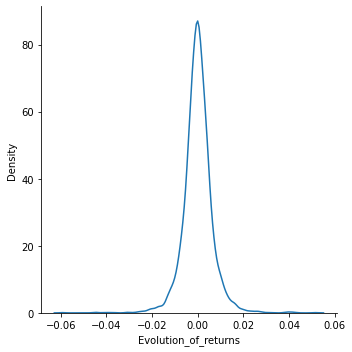

In [35]:
sns.displot( Results["Evolution_of_returns"] , kind = "kde" )

Seeing the distribution of my returns after each period,multiple observations can be said : 

1. The skewness of the strategy is non observable.
2. The strategy will definitely be a losing one if we add fees,which will be high due to the weekly rebalancing feature.

In our opinion multiple factors can contribute to the strategy poor performance :

1. The holding period : In most cases , the strategy is probably holding during the weekend , and during that time multiple macroenomic events could emerge and affect the positions.
2. The distribution of the returns has no skew : On a practical level , momentum strategies usually have a positive skew , it means they have fewer gains , but the gains that they have are large,which is not the case in our strategy.

---

At this moment, It is clear that the distribution in discrete time will be similar to the logarithmic one, since the numbers we are using are small.


In [36]:
returns = Results.apply(lambda x : (math.exp(x) - 1) , axis = 1)

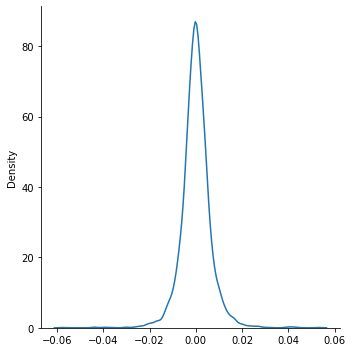

In [37]:
sns.displot( returns , kind = "kde")

In [38]:
returns.skew()

0.09128502313294497

The distribution is as expected similar

---

Analyzing the distribution of the returns of our portfolio
---

At this stage We need to check the evolution of my portfolio during all the holding phase , that is from 2004 till 2019. We will suppose that the portfolio has the value of 100 at the beginning.

In [39]:
size = np.shape(Results)[0]

portfolio_results = pd.DataFrame()
portfolio_results["Portfolio_returns"] = Results.iloc[9:size:5]

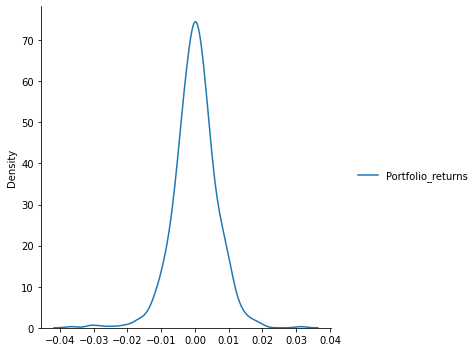

In [40]:
sns.displot( portfolio_results , kind = "kde")

In [41]:
print("average return of the portfolio " , portfolio_results.mean())
print("standard deviation of the strategy " , portfolio_results.std())
print(" skewness of the strategy" , portfolio_results.skew())
print(" kutosis of the strategy" , portfolio_results.kurtosis())

average return of the portfolio  Portfolio_returns    0.000063
dtype: float64
standard deviation of the strategy  Portfolio_returns    0.006412
dtype: float64
 skewness of the strategy Portfolio_returns   -0.47929
dtype: float64
 kutosis of the strategy Portfolio_returns    3.566065
dtype: float64


At this stage , I want to plot the evolution of the portfolio evolution  since the start of the momentum strategy to analyse the strategy.

In [42]:
returns = pd.DataFrame(returns , columns = Results.columns, index = Results.index)
returns

,Evolution_of_returns
Date,
2004-01-02,0.000000
2004-01-05,0.000000
2004-01-06,0.000000
2004-01-07,0.000000
2004-01-08,0.000000
...,...
2019-10-24,0.004744
2019-10-25,0.000000
2019-10-28,0.000000


In [43]:
returns["Portfolio_Evolution"] = returns["Evolution_of_returns"] +1
returns.head(20)

,Evolution_of_returns,Portfolio_Evolution
Date,,
2004-01-02,0.000000,1.000000
2004-01-05,0.000000,1.000000
2004-01-06,0.000000,1.000000
2004-01-07,0.000000,1.000000
2004-01-08,0.000000,1.000000
2004-01-09,-0.004650,0.995350
2004-01-12,-0.002591,0.997409
2004-01-13,0.003849,1.003849
2004-01-14,0.001288,1.001288


In [44]:
for i in range(1 , len(returns)):
    returns["Portfolio_Evolution"].iloc[i] = returns["Portfolio_Evolution"].iloc[ i - 1 ] * returns["Portfolio_Evolution"].iloc[i]

In [45]:
returns.tail(20)

,Evolution_of_returns,Portfolio_Evolution
Date,,
2019-10-03,0.007759,1.233701
2019-10-04,0.003180,1.237625
2019-10-07,-0.002115,1.235007
2019-10-08,0.000445,1.235557
2019-10-09,0.003289,1.239620
2019-10-10,0.001371,1.241320
2019-10-11,0.004750,1.247216
2019-10-14,-0.002571,1.244010
2019-10-15,-0.000383,1.243533


<AxesSubplot:xlabel='Date', ylabel='Portfolio_Evolution'>

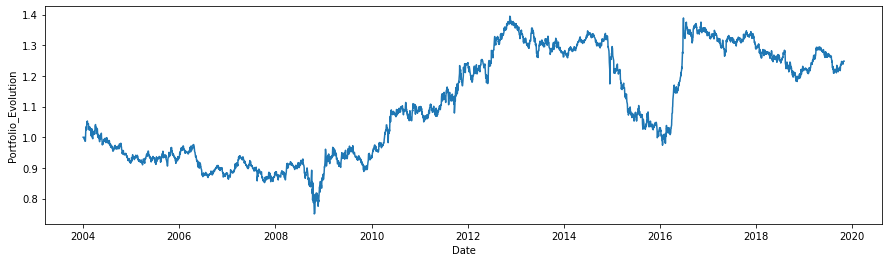

In [46]:
plt.figure(figsize = (15,4))
sns.lineplot(y = returns["Portfolio_Evolution"] , x = returns.index )

By analyzing the portfolio evolution, and supposing no fees , it's clear that the strategy suffers multiple drawdowns , in particular the drawdown from 2004 till 2008 and , 2015 till 2016 ,and from 2016 till 2019.

In [47]:
returns["Portfolio_Evolution"].mean()

1.1067460608772837

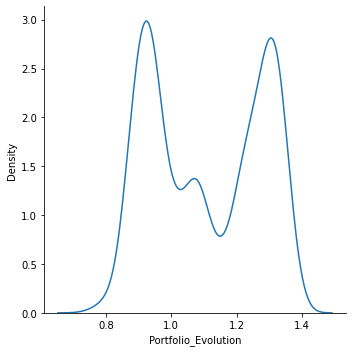

In [48]:
sns.displot( returns["Portfolio_Evolution"] , kind = "kde")

In [49]:
returns["Portfolio_Evolution"].std()

0.17159608381381874